In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.special as special
plt.rcParams['font.family'] = 'Arial'

## cell drawer
Random periodic function.
https://math.stackexchange.com/questions/464548/generating-a-random-periodic-function-with-bounded-amplitude-and-bounded-fourier


$$
\sum_k A_k cos(kt + klnk)
$$

In [564]:
def cell_drawer(center_x, center_y, ax, scale_x=1, scale_y=1, color='red'):
    nk = 2
    t = np.linspace(0, 2* np.pi, 101)
    k = np.linspace(1,nk,nk)
    coefs_x = np.exp(np.random.normal(loc=-2, scale=0.5, size=nk))
    coefs_y = np.exp(np.random.normal(loc=-2, scale=0.5, size=nk))
    sign_x = np.random.binomial(n=1,p=0.5) -0.5
    sign_y = np.random.binomial(n=1,p=0.5) -0.5

    curve_x = 0.5 * np.cos(t) + \
        sign_x * (coefs_x[:,None] * np.cos((k[:,None] * t[None,:] + (k * np.log(k))[:,None]))).sum(axis=0)
    curve_y = 0.5 * np.sin(t) + \
        sign_y * (coefs_y[:,None] * np.cos((k[:,None] * t[None,:] + (k * np.log(k))[:,None]))).sum(axis=0)
    
    ax.plot(scale_x*curve_x + center_x, scale_y*curve_y + center_y, ls='--', color=color, alpha=0.5, lw=1)
    ax.plot(scale_x*0.1*np.cos(t) + center_x, scale_y*0.1*np.sin(t) + center_y, color=color,lw=.5)
    ax.fill(scale_x*0.1*np.cos(t) + center_x, scale_y*0.1*np.sin(t) + center_y, color=color, alpha=0.5)
    
    


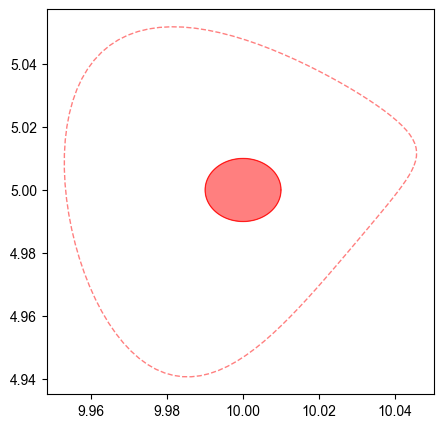

In [571]:
fig, ax = plt.subplots(figsize=(5,5))
cell_drawer(10 ,5 , ax, 0.1, 0.1)

## distributional misspecification

In [504]:
# define poisson pmf on reals using Gamma
def f(x, mu):
    return (mu ** x) * np.exp(-mu) / special.gamma(x+1)

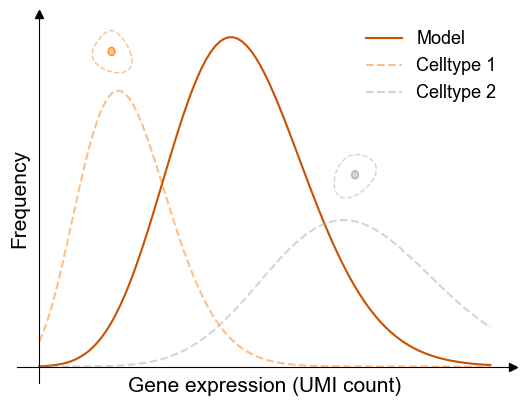

In [573]:
# colormap: https://github.com/matplotlib/matplotlib/blob/main/lib/matplotlib/mpl-data/stylelib/tableau-colorblind10.mplstyle
# set seed
np.random.seed(6)

# distribution simulation
x = np.linspace(0,20,101)
y_true = (f(x, 4) + f(x,14))/2
y_model = f(x,9) * 0.9
# plot
fig, ax = plt.subplots()

# plot prob densities
ax.plot(x, y_model, color='#C85200', label='Model')
ax.plot(x, 0.5* f(x,4), ls='--', color='#FF800E', alpha=0.5, label='Celltype 1')
ax.plot(x, 0.5*f(x,14), ls='--', color='#ABABAB', alpha=0.5, label='Celltype 2')

# cells
cell_drawer(3.2, 0.115, ax, scale_x=1.5, scale_y=0.015, color='#FF800E')
cell_drawer(14, 0.07, ax, scale_x=1.5, scale_y=0.015, color='#ABABAB')

# legend
ax.legend(fontsize=13, frameon=False)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_yticks([])
ax.set_xlabel('Gene expression (UMI count)', fontsize=15)
ax.set_xticks([])
ax.spines[['right', 'top']].set_visible(False)

# custom spine https://matplotlib.org/3.3.4/gallery/recipes/centered_spines_with_arrows.html
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.show()

## Subject autocorrelation

In [659]:
# https://stackoverflow.com/questions/30008322/draw-a-curve-connecting-two-points-instead-of-a-straight-line
def hanging_line(point1, point2):
  
    x = np.linspace(point1[0], point2[0], 100)
    a = 6
    y = a * (x-point1[0]) * (x-point2[0]) + point1[1]

    return (x,y)

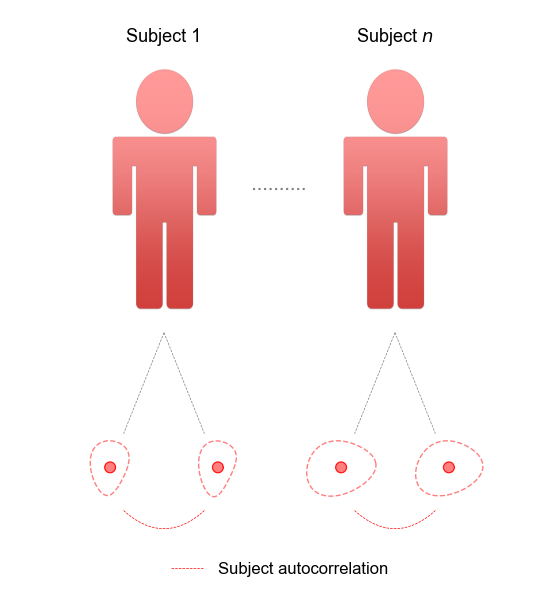

In [692]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
np.random.seed(1)
# https://stackoverflow.com/questions/61169982/set-location-of-image-in-matplotlib
fig, ax = plt.subplots(figsize=(7,7))

# set scale
ax.set_xlim([0,1])
ax.set_ylim([0,1])

# set spine
ax.spines[['right', 'left', 'bottom', 'top']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# draw human
img = mpimg.imread('man.png', 0)
ax.imshow(img, extent=[1/3.5-1/8, 1/3.5+1/8, 1/2-1/4+1/6, 1/2+1/4+1/6]) # subject 1
ax.imshow(img, extent=[2.5/3.5-1/8, 2.5/3.5+1/8, 1/2-1/4+1/6, 1/2+1/4+1/6]) # subject 2

# draw cell
cell1, cell2 = np.array([1/3.5-1/10 , 0.15]), np.array([1/3.5+1/10 , 0.15])
cell3, cell4 = np.array([2.5/3.5-1/10, 0.15]), np.array([2.5/3.5+1/10, 0.15])

cell_drawer(cell1[0], cell1[1], ax, 0.1, 0.1)
cell_drawer(cell2[0], cell2[1], ax, 0.1, 0.1)
cell_drawer(cell3[0], cell3[1], ax, 0.1, 0.1)
cell_drawer(cell4[0], cell4[1], ax, 0.1, 0.1)

# draw dotted line
start_point_1 = np.array([1/3.5, 0.4])
end_point_1 = start_point_1 * 1/4 + cell1 * 3/4
end_point_2 = start_point_1 * 1/4 + cell2 * 3/4
ax.plot([start_point_1[0], end_point_1[0]], [start_point_1[1], end_point_1[1]], ls='--', color='black', alpha=0.5, lw=0.5)
ax.plot([start_point_1[0], end_point_2[0]], [start_point_1[1], end_point_2[1]], ls='--', color='black', alpha=0.5, lw=0.5)

start_point_2 = np.array([2.5/3.5, 0.4])
end_point_3 = start_point_2 * 1/4 + cell3 * 3/4
end_point_4 = start_point_2 * 1/4 + cell4 * 3/4
ax.plot([start_point_2[0], end_point_3[0]], [start_point_2[1], end_point_3[1]], ls='--', color='black', alpha=0.5, lw=0.5)
ax.plot([start_point_2[0], end_point_4[0]], [start_point_2[1], end_point_4[1]], ls='--', color='black', alpha=0.5, lw=0.5)

ax.plot([0.45, 0.55], [1/2+1/6, 1/2+1/6], ls='dotted', color='grey')

# dotted line between cells
x,y = hanging_line((end_point_1[0], 0.07), (end_point_2[0], 0.1))
ax.plot(x,y,ls='--', c='red',lw=0.5, label='Subject autocorrelation')
x,y = hanging_line((end_point_3[0], 0.07), (end_point_4[0], 0.1))
ax.plot(x,y,ls='--', c='red',lw=0.5)

# text legend
ax.text(1/3.5, 0.95, 'Subject 1', fontsize=13, ha='center', va='center')
ax.text(2.5/3.5, 0.95, 'Subject $n$', fontsize=13, ha='center', va='center')
ax.legend(fontsize=12, frameon=False, loc='lower center', bbox_to_anchor=(0.5, -0.08))

plt.show()